In [ ]:
import pandas as pd # learn more: https://python.org/pypi/pandas
import numpy as np
import matplotlib.pyplot as plot
# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [ ]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

# **data**

In [ ]:
#Uploading csv files into google colab
from google.colab import files
uploaded = files.upload()

In [ ]:
# storing dataset to dataframe df
import io
df = pd.read_csv(io.BytesIO(uploaded['air_bnb.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   name                            22493 non-null  object 
 2   host_id                         22552 non-null  int64  
 3   host_name                       22526 non-null  object 
 4   neighbourhood_group             22552 non-null  object 
 5   neighbourhood                   22552 non-null  object 
 6   latitude                        22552 non-null  float64
 7   longitude                       22552 non-null  float64
 8   room_type                       22552 non-null  object 
 9   price                           22552 non-null  int64  
 10  minimum_nights                  22552 non-null  int64  
 11  number_of_reviews               22552 non-null  int64  
 12  last_review                     

In [ ]:
df = df.dropna()

In [ ]:
df_h=df[['neighbourhood_group','neighbourhood','last_review','room_type']].copy()
df_h = df_h.apply(LabelEncoder().fit_transform)
print(df_h)

       neighbourhood_group  neighbourhood  last_review  room_type
0                        4             18         1299          0
1                        6             95         1272          1
2                        6             98          720          0
3                       10            110         1226          1
4                        6             49         1306          1
...                    ...            ...          ...        ...
22449                    2             76         1306          1
22463                   11             84         1308          0
22475                    1             32         1307          1
22508                    6             95         1309          0
22536                    6             98         1309          0

[18587 rows x 4 columns]


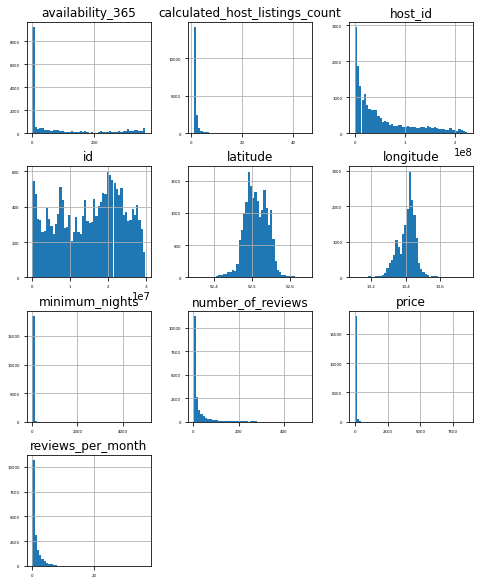

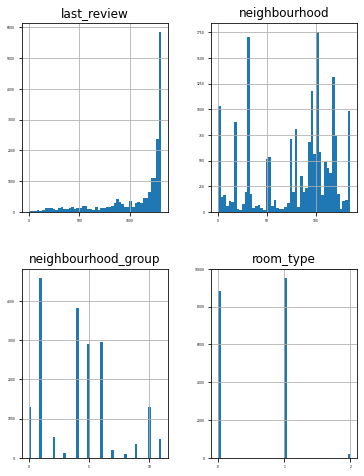

In [ ]:
df.hist(figsize=(8,10), bins=50, xlabelsize=4, ylabelsize=4);
df_h.hist(figsize=(6,8), bins=50, xlabelsize=3, ylabelsize=3);

In [ ]:
df_feature=df[['host_id','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].copy()
print(df_feature)
#room_type

         host_id  price  ...  calculated_host_listings_count  availability_365
0           2217     60  ...                               4               141
1           2986     17  ...                               1                 0
2           3718     90  ...                               1               220
3           4108     26  ...                               1               297
4          17391     42  ...                               1                26
...          ...    ...  ...                             ...               ...
22449   20727291     25  ...                               1                32
22463   22437698     99  ...                               2               339
22475  224133729     25  ...                               1                 8
22508  224295751     70  ...                               1               350
22536     607481    150  ...                               1                69

[18587 rows x 7 columns]


In [ ]:
df_p=df[['room_type']].copy()
print(df_p)

             room_type
0      Entire home/apt
1         Private room
2      Entire home/apt
3         Private room
4         Private room
...                ...
22449     Private room
22463  Entire home/apt
22475     Private room
22508  Entire home/apt
22536  Entire home/apt

[18587 rows x 1 columns]


In [ ]:
# df_feature = df_feature.apply(LabelEncoder().fit_transform)
# print(df_feature)

In [ ]:
df_p = df_p.apply(LabelEncoder().fit_transform)
print(df_p)

       room_type
0              0
1              1
2              0
3              1
4              1
...          ...
22449          1
22463          0
22475          1
22508          0
22536          0

[18587 rows x 1 columns]


In [ ]:
X = df_feature
y = df_p
print(X.shape)
print(y.shape)
X

(18587, 7)
(18587, 1)


,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2217,60,4,118,3.76,4,141
1,2986,17,2,6,1.42,1,0
2,3718,90,62,143,1.25,1,220
3,4108,26,5,25,0.39,1,297
4,17391,42,2,197,1.75,1,26
...,...,...,...,...,...,...,...
22449,20727291,25,2,1,1.00,1,32
22463,22437698,99,1,5,5.00,2,339
22475,224133729,25,1,1,1.00,1,8
22508,224295751,70,1,1,1.00,1,350


In [ ]:
df_df = X.join(y)
df_df

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type
0,2217,60,4,118,3.76,4,141,0
1,2986,17,2,6,1.42,1,0,1
2,3718,90,62,143,1.25,1,220,0
3,4108,26,5,25,0.39,1,297,1
4,17391,42,2,197,1.75,1,26,1
...,...,...,...,...,...,...,...,...
22449,20727291,25,2,1,1.00,1,32,1
22463,22437698,99,1,5,5.00,2,339,0
22475,224133729,25,1,1,1.00,1,8,1
22508,224295751,70,1,1,1.00,1,350,0


host_id                           0.080303
price                            -0.130257
minimum_nights                   -0.063752
number_of_reviews                -0.038499
reviews_per_month                 0.023927
calculated_host_listings_count   -0.021361
availability_365                 -0.087538
room_type                         1.000000
Name: room_type, dtype: float64


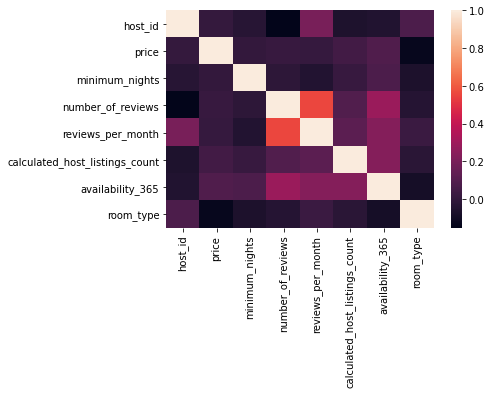

In [ ]:
ax = sns.heatmap(df_df.corr())
print(df_df.corr()['room_type'])

In [ ]:
df_feature=((df_feature-df_feature.min())/(df_feature.max()-df_feature.min()))
df_feature.head()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.000000,0.006977,0.000600,0.235412,0.102291,0.068182,0.386301
1,0.000003,0.001977,0.000200,0.010060,0.038462,0.000000,0.000000
2,0.000007,0.010465,0.012202,0.285714,0.033824,0.000000,0.602740
3,0.000008,0.003023,0.000800,0.048290,0.010366,0.000000,0.813699
4,0.000068,0.004884,0.000200,0.394366,0.047463,0.000000,0.071233


In [ ]:
X = df_feature
df_df = X.join(y)
df_df

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.006977,0.000600,0.235412,0.102291,0.068182,0.386301,0
1,0.000003,0.001977,0.000200,0.010060,0.038462,0.000000,0.000000,1
2,0.000007,0.010465,0.012202,0.285714,0.033824,0.000000,0.602740,0
3,0.000008,0.003023,0.000800,0.048290,0.010366,0.000000,0.813699,1
4,0.000068,0.004884,0.000200,0.394366,0.047463,0.000000,0.071233,1
...,...,...,...,...,...,...,...,...
22449,0.092402,0.002907,0.000200,0.000000,0.027005,0.000000,0.087671,1
22463,0.100027,0.011512,0.000000,0.008048,0.136116,0.022727,0.928767,0
22475,0.999278,0.002907,0.000000,0.000000,0.027005,0.000000,0.021918,1
22508,1.000000,0.008140,0.000000,0.000000,0.027005,0.000000,0.958904,0


In [ ]:
df_df.to_csv('data_after_preprocessing.csv')

In [ ]:
from sklearn import preprocessing

X = df_feature #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6
0,0.000000,0.006977,0.000600,0.235412,0.102291,0.068182,0.386301
1,0.000003,0.001977,0.000200,0.010060,0.038462,0.000000,0.000000
2,0.000007,0.010465,0.012202,0.285714,0.033824,0.000000,0.602740
3,0.000008,0.003023,0.000800,0.048290,0.010366,0.000000,0.813699
4,0.000068,0.004884,0.000200,0.394366,0.047463,0.000000,0.071233
...,...,...,...,...,...,...,...
18582,0.092402,0.002907,0.000200,0.000000,0.027005,0.000000,0.087671
18583,0.100027,0.011512,0.000000,0.008048,0.136116,0.022727,0.928767
18584,0.999278,0.002907,0.000000,0.000000,0.027005,0.000000,0.021918
18585,1.000000,0.008140,0.000000,0.000000,0.027005,0.000000,0.958904


In [ ]:
norm = StandardScaler()
norm.fit(X)
X = pd.DataFrame(norm.transform(X))

X

,0,1,2,3,4,5,6
0,-0.917317,-0.013649,-0.058768,2.442345,1.738583,0.548734,0.470213
1,-0.917304,-0.308431,-0.105112,-0.395755,0.186921,-0.247881,-0.699808
2,-0.917291,0.192013,1.285218,3.075849,0.074193,-0.247881,1.125757
3,-0.917284,-0.246732,-0.035595,0.085708,-0.496076,-0.247881,1.764704
4,-0.917049,-0.137046,-0.105112,4.444219,0.405745,-0.247881,-0.484059
...,...,...,...,...,...,...,...
18582,-0.551159,-0.253587,-0.105112,-0.522456,-0.091583,-0.247881,-0.434271
18583,-0.520940,0.253711,-0.128284,-0.421095,2.560832,0.017658,2.113221
18584,3.042507,-0.253587,-0.128284,-0.522456,-0.091583,-0.247881,-0.633424
18585,3.045370,0.054905,-0.128284,-0.522456,-0.091583,-0.247881,2.204499


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,test_size=0.7,random_state=123)

# **clasification**

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
model_dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.7253093536238567

In [ ]:
#K-NN
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train,y_train)
model_knn = neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7469064637614327

In [ ]:
#SVM
svm = SVC(gamma='auto')
svm.fit(X_train,y_train)
model_svm = svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7933287218507417

# **EVALUATION**
using confusion matrix and classification report

**confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
y_test
y_pred
print(confusion_matrix(y_test, y_pred))
# print('True', y_test[0:25])
# print('Pred', y_pred[0:25])

[[4580 1585    0]
 [ 967 5727    4]
 [  31  102   15]]


In [ ]:
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(TP)
print(TN)
print(FP)
print(FN)

[[4580 1585    0]
 [ 967 5727    4]
 [  31  102   15]]
5727
4580
1585
967


In [ ]:
#accuracy score
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8015397775876818
0.7933287218507417


In [ ]:
#classification_error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.19846022241231823
0.20667127814925834


In [ ]:
#sensitivity or recall
sensitivity = TP / float(FN + TP)
print(sensitivity)

0.8555422766656707


In [ ]:
#specificity 

specificity = TN / float(TN + FP)
print(specificity)

0.7429034874290349


In [ ]:
#false positive rate
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.2570965125709651
0.2570965125709651


In [ ]:
#precision
precision = TP / (TP + FP)
print(precision)

0.7832330415754923


In [ ]:
#f1 score
f1_score = 2*precision*specificity / (precision + specificity) 
print(f1_score)

0.762535391817959


# **CLUSTERING**

**KMEANS1**

In [ ]:
from numpy import c_

In [ ]:
cluster_feature =df[['latitude','longitude']].copy()
print(cluster_feature)

        latitude  longitude
0      52.534537  13.402557
1      52.548513  13.404553
2      52.534996  13.417579
3      52.498855  13.349065
4      52.543157  13.415091
...          ...        ...
22449  52.502952  13.490870
22463  52.457982  13.526945
22475  52.507884  13.467071
22508  52.552250  13.410904
22536  52.536666  13.411360

[18587 rows x 2 columns]


In [ ]:
cluster_feature=((cluster_feature-cluster_feature.min())/(cluster_feature.max()-cluster_feature.min()))
cluster_feature.head()

,latitude,longitude
0,0.638272,0.457127
1,0.685535,0.460179
2,0.639823,0.480093
3,0.517599,0.375345
4,0.667423,0.476290


In [ ]:
cluster_feature.to_csv('dataFORclustering_after_preprocessing.csv')

In [ ]:
cluster_feature = cluster_feature.to_numpy()
cluster_feature

array([[0.63827166, 0.45712723],
       [0.68553466, 0.46017867],
       [0.63982349, 0.48009326],
       ...,
       [0.5481344 , 0.5557605 ],
       [0.69817362, 0.46988818],
       [0.64547016, 0.47058592]])

In [ ]:
%matplotlib inline 
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_feature)
    distortions.append(kmeanModel.inertia_)

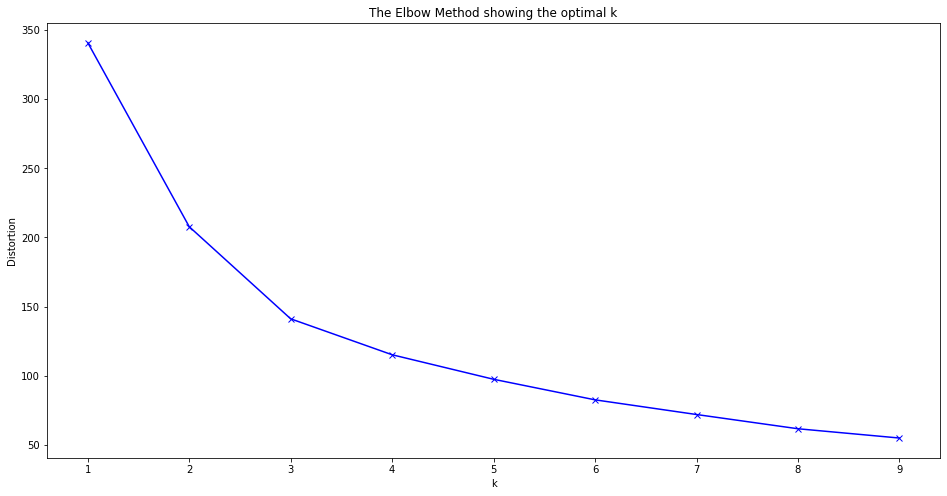

In [ ]:
plot.figure(figsize=(16,8))
plot.plot(K, distortions, 'bx-')
plot.xlabel('k')
plot.ylabel('Distortion')
plot.title('The Elbow Method showing the optimal k')
plot.show()

In [ ]:
m=cluster_feature.shape[0] #number of training examples
n=cluster_feature.shape[1] #number of features. Here n=2
n_iter=25
K=4 # number of clusters
print('dimention :',n)

dimention : 2


In [ ]:
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=np.random.randint(0,m-1)
    Centroids=np.c_[Centroids,cluster_feature[rand]]
Centroids

array([[0.59264425, 0.78338443, 0.27867241, 0.43975305],
       [0.57267522, 0.28926979, 0.35400849, 0.50003026]])

In [ ]:
Output={}

In [ ]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((cluster_feature-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [ ]:
tempDist

array([0.04125031, 0.06199675, 0.04042567, ..., 0.01485238, 0.06768974,
       0.0431865 ])

In [ ]:
EuclidianDistance

array([[0.0154332 , 0.04923384, 0.13994509, 0.04125031],
       [0.0212841 , 0.03878442, 0.176809  , 0.06199675],
       [0.0107973 , 0.05702334, 0.14632747, 0.04042567],
       ...,
       [0.00226723, 0.12635988, 0.11331364, 0.01485238],
       [0.02170162, 0.03988388, 0.18940937, 0.06768974],
       [0.0132128 , 0.05189589, 0.14813089, 0.0431865 ]])

In [ ]:
C

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],cluster_feature[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [ ]:
Y

{1: array([[0.63827166, 0.45712723],
        [0.68553466, 0.46017867],
        [0.63982349, 0.48009326],
        ...,
        [0.5481344 , 0.5557605 ],
        [0.69817362, 0.46988818],
        [0.64547016, 0.47058592]]), 2: array([[0.58801481, 0.30352621],
        [0.79710168, 0.44994354],
        [0.6257184 , 0.36487173],
        ...,
        [0.61304771, 0.33971895],
        [0.68304383, 0.41957453],
        [0.72433799, 0.42010224]]), 3: array([[0.26888021, 0.34323487],
        [0.45675675, 0.28501653],
        [0.44812656, 0.31776469],
        ...,
        [0.28805223, 0.38966515],
        [0.42290267, 0.33385357],
        [0.3369706 , 0.21307058]]), 4: array([[0.51759902, 0.37534524],
        [0.50617307, 0.48657959],
        [0.50405702, 0.49679129],
        ...,
        [0.53085374, 0.42806172],
        [0.49182469, 0.35540215],
        [0.37937355, 0.64729757]])}

In [ ]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((cluster_feature-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],cluster_feature[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
Y

{1: array([[0.53767824, 0.50688363],
        [0.53071521, 0.50614673],
        [0.56673838, 0.56015751],
        ...,
        [0.57139817, 0.55544296],
        [0.53145341, 0.59214489],
        [0.5481344 , 0.5557605 ]]), 2: array([[0.63827166, 0.45712723],
        [0.68553466, 0.46017867],
        [0.63982349, 0.48009326],
        ...,
        [0.59158822, 0.4389147 ],
        [0.69817362, 0.46988818],
        [0.64547016, 0.47058592]]), 3: array([[0.51759902, 0.37534524],
        [0.48668716, 0.4222551 ],
        [0.58801481, 0.30352621],
        ...,
        [0.51843417, 0.43474314],
        [0.53085374, 0.42806172],
        [0.49182469, 0.35540215]]), 4: array([[0.50617307, 0.48657959],
        [0.50405702, 0.49679129],
        [0.4744845 , 0.50644811],
        ...,
        [0.37211748, 0.62567031],
        [0.49690573, 0.44959223],
        [0.37937355, 0.64729757]])}

In [ ]:
Output = Y

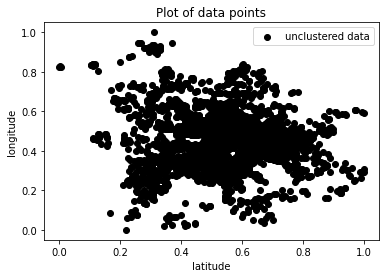

In [ ]:
plot.scatter(cluster_feature[:,0],cluster_feature[:,1],c='black',label='unclustered data')
plot.xlabel('latitude')
plot.ylabel('longitude')
plot.legend()
plot.title('Plot of data points')
plot.show()

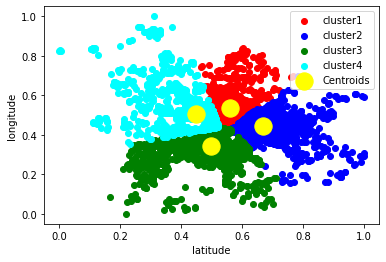

In [ ]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plot.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plot.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plot.xlabel('latitude')
plot.ylabel('longitude')
plot.legend()
plot.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4001712281178516


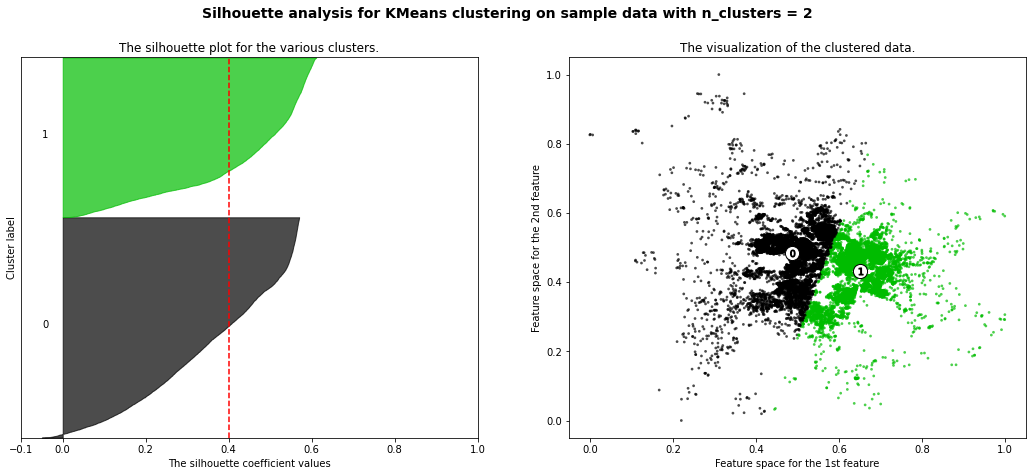

For n_clusters = 3 The average silhouette_score is : 0.43727400951025475


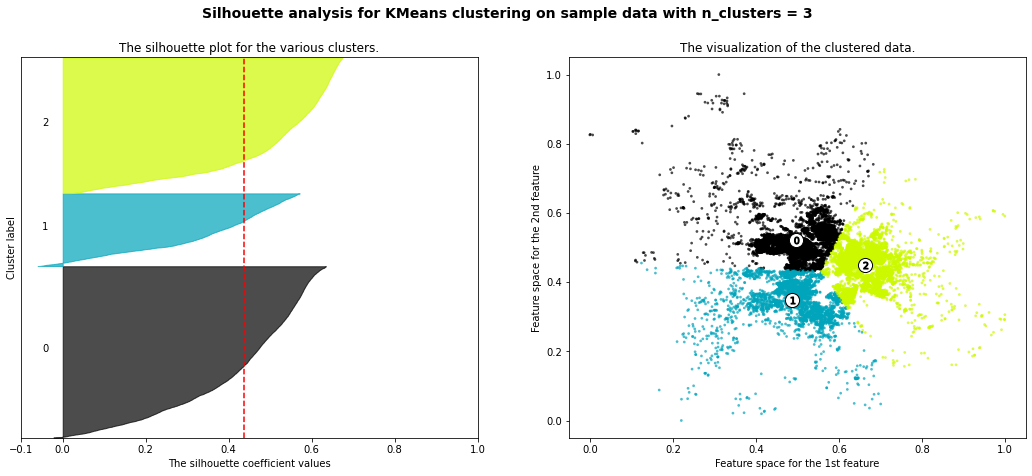

For n_clusters = 4 The average silhouette_score is : 0.38637525154120017


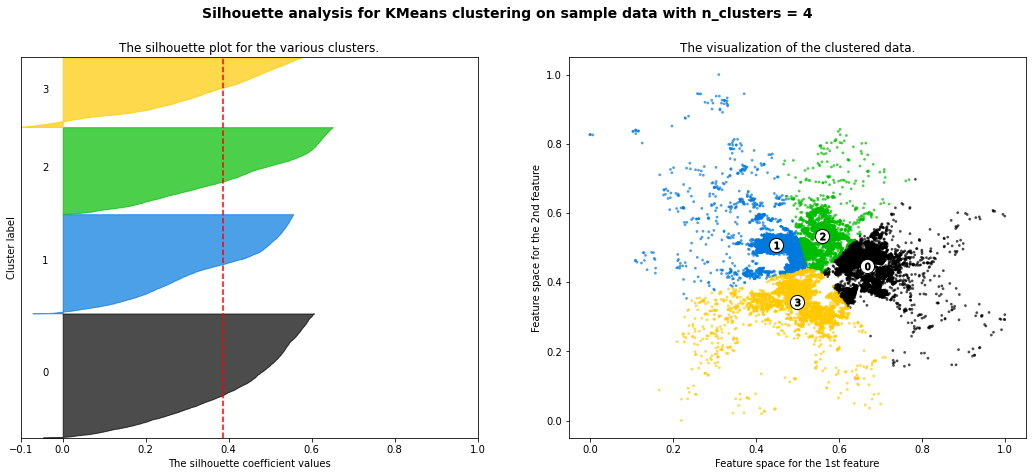

In [ ]:
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cluster_feature) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cluster_feature)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cluster_feature, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cluster_feature, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(cluster_feature[:, 0], cluster_feature[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

**KMEANS2**

In [ ]:
dataC = df[['neighbourhood_group','neighbourhood']].copy()

In [ ]:
dataC.to_csv('dataFORclustering2_after_preprocessing.csv')

In [ ]:
dataC= dataC.apply(LabelEncoder().fit_transform)
dataC

,neighbourhood_group,neighbourhood
0,4,18
1,6,95
2,6,98
3,10,110
4,6,49
...,...,...
22449,2,76
22463,11,84
22475,1,32
22508,6,95


In [ ]:
dataC = dataC.iloc[:, 0:].values
dataC

array([[ 4, 18],
       [ 6, 95],
       [ 6, 98],
       ...,
       [ 1, 32],
       [ 6, 95],
       [ 6, 98]])

In [ ]:
%matplotlib inline 
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataC)
    distortions.append(kmeanModel.inertia_)

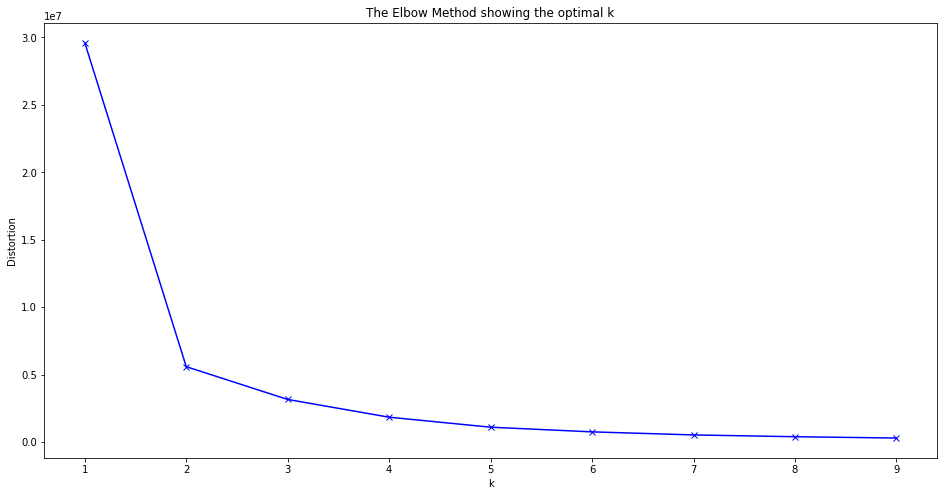

In [ ]:
plot.figure(figsize=(16,8))
plot.plot(K, distortions, 'bx-')
plot.xlabel('k')
plot.ylabel('Distortion')
plot.title('The Elbow Method showing the optimal k')
plot.show()

In [ ]:
m=dataC.shape[0] #number of training examples
n=dataC.shape[1] #number of features. Here n=2
n_iter=25
K=4 # number of clusters
print('dimention :',n)

dimention : 2


In [ ]:
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=np.random.randint(0,m-1)
    Centroids=np.c_[Centroids,dataC[rand]]
Centroids

array([[  6.,   0.,   5.,   7.],
       [122.,  27., 101., 126.]])

In [ ]:
Output={}

In [ ]:
#import math
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    #dist = np.linalg.norm(dataC-Centroids[:,k])
    tempDist=np.sum((dataC-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [ ]:
tempDist

array([11673.,   962.,   785., ...,  8872.,   962.,   785.])

In [ ]:
EuclidianDistance

array([[1.0820e+04, 9.7000e+01, 6.8900e+03, 1.1673e+04],
       [7.2900e+02, 4.6600e+03, 3.7000e+01, 9.6200e+02],
       [5.7600e+02, 5.0770e+03, 1.0000e+01, 7.8500e+02],
       ...,
       [8.1250e+03, 2.6000e+01, 4.7770e+03, 8.8720e+03],
       [7.2900e+02, 4.6600e+03, 3.7000e+01, 9.6200e+02],
       [5.7600e+02, 5.0770e+03, 1.0000e+01, 7.8500e+02]])

In [ ]:
C

array([2, 3, 3, ..., 2, 3, 3])

In [ ]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],dataC[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [ ]:
Y

{1: array([[  1., 118.],
        [  1., 118.],
        [  1., 118.],
        ...,
        [  1., 115.],
        [  1., 115.],
        [  0., 120.]]), 2: array([[ 4., 18.],
        [ 6., 49.],
        [ 4., 18.],
        ...,
        [ 6., 49.],
        [ 4.,  2.],
        [ 1., 32.]]), 3: array([[  6.,  95.],
        [  6.,  98.],
        [ 10., 110.],
        ...,
        [ 11.,  84.],
        [  6.,  95.],
        [  6.,  98.]]), 4: array([[  1., 134.],
        [  1., 134.],
        [  1., 135.],
        ...,
        [  1., 135.],
        [  1., 135.],
        [  9., 132.]])}

In [ ]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((dataC-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],dataC[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [ ]:
Output = Y

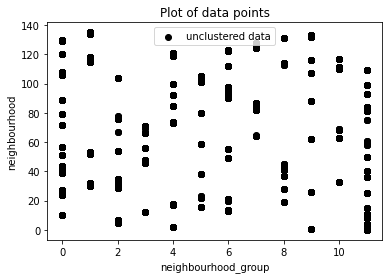

In [ ]:
plot.scatter(dataC[:,0],dataC[:,1],c='black',label='unclustered data')
plot.xlabel('neighbourhood_group')
plot.ylabel('neighbourhood')
plot.legend()
plot.title('Plot of data points')
plot.show()

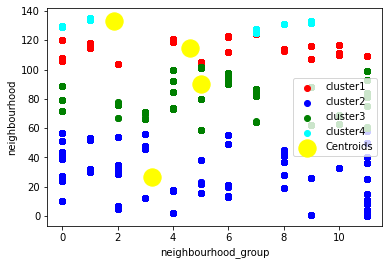

In [ ]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
  plot.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plot.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plot.xlabel('neighbourhood_group')
plot.ylabel('neighbourhood')
plot.legend()
plot.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7179304733723437


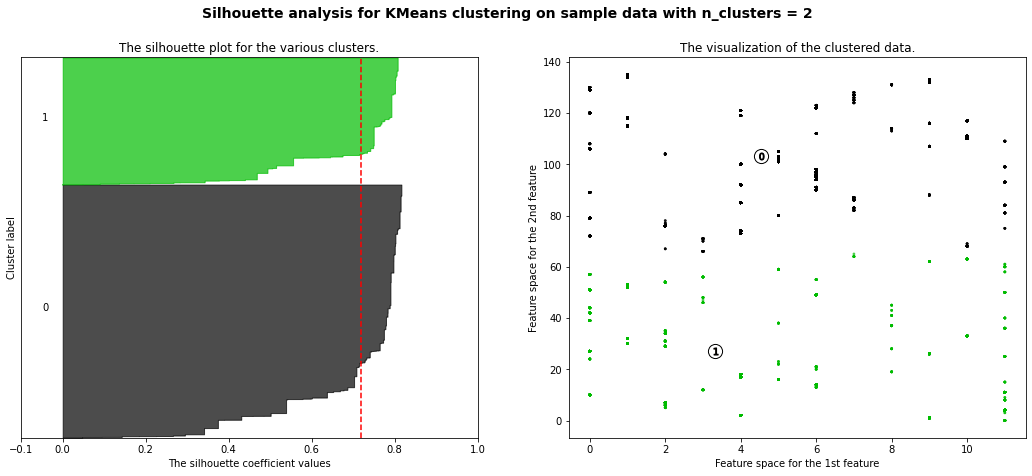

For n_clusters = 3 The average silhouette_score is : 0.5986040253844332


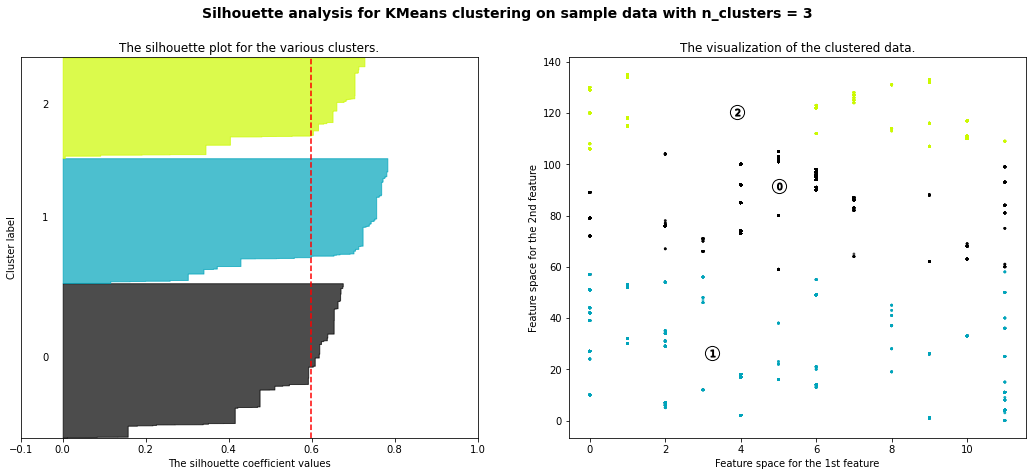

For n_clusters = 4 The average silhouette_score is : 0.5809846232981604


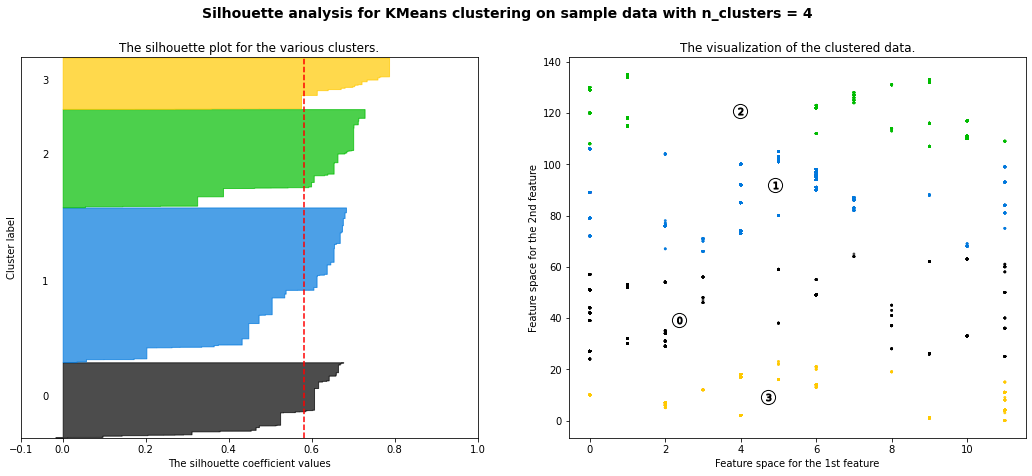

In [ ]:
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataC) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataC)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataC, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataC, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataC[:, 0], dataC[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()